Exploratory Data Analysis - Building Energy Efficiency

So far, we've organized our data by renaming the our columns (to make the x and y variables identifiable). We will look for outliers and will plot general information about our dataset. 


We'll conduct univariate analysis to individually explore each variable, and will conduct bivariate analyisis characteristics to explore the relationships between variables. 

In [23]:
import pandas as pd
import matplotlib as plt
import seaborn as sns


In [24]:
#Loading energy efficiency pandas dataframe

df = pd.read_excel('../data/raw/energy_efficiency_file.xlsx')

In [25]:
#Displaying first 5 rows of data

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [26]:
#Summary Stats

df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [27]:
#Renaming colummn names for clarity on what 'X' values represent

df.rename(columns= {'X1': 'Relative Compactness', 'X2': 'Surface Area', 'X3': 'Wall Area', 'X4':'Roof Area', 'X5': 'Overall Height', 'X6': 'Orientation', 'X7': 'Glazing Area', 'X8': 'Glazing Area Distribution', 'Y1': 'Heating Load', 'Y2': 'Cooling Load'}, inplace = True)
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [28]:
#Dropping the Cooling Load (Y2) column, as the only Y variable we'll only be focusing on is Heating Load(Y1) in this analysis. 

df.drop('Cooling Load', axis = 1, inplace = True)
df

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48


In [53]:
#Checking for null values
df.isna().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
dtype: int64

Univariate Analysis

EDIT (change wording and add more details):

We'll be generating visuals for each numeric variable to get idea of outliers and distributions in dataset. Additionally, we'll also visualize frequency-count of qualitative variables to understand composition of dataset. 

c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Relative Compactness', ylabel='Count'>

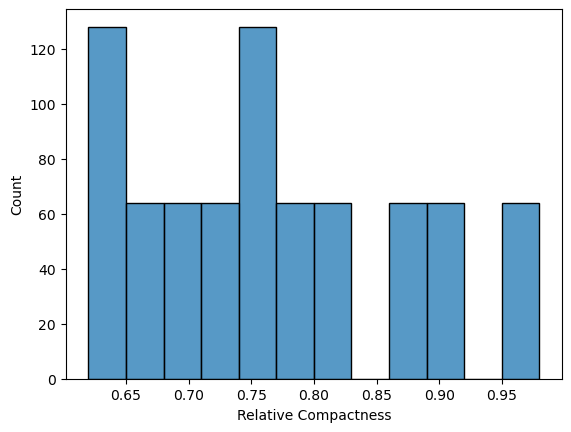

In [29]:
#Seaborn histogram for Relative Compactness

sns.histplot(data = df, x = "Relative Compactness")

c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Surface Area', ylabel='Count'>

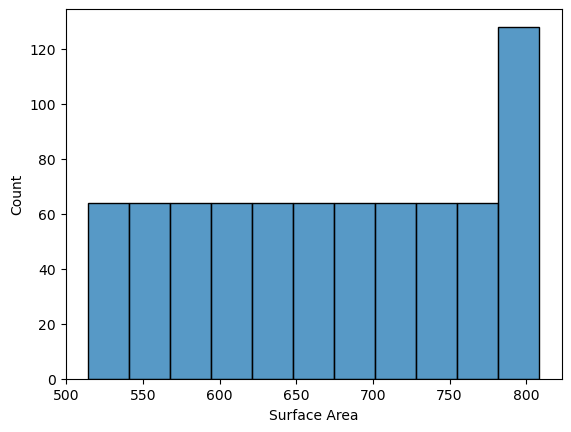

In [30]:
#Seaborn histogram for Surface Area

sns.histplot(data = df, x = "Surface Area")

c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Wall Area', ylabel='Count'>

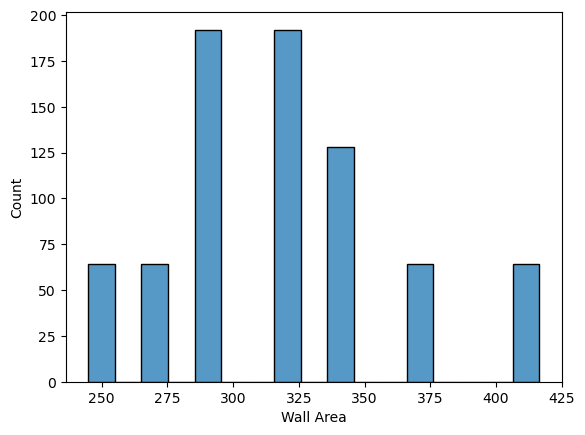

In [31]:
#Seaborn histogram for Wall Area

sns.histplot(data = df, x = 'Wall Area')

c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Roof Area', ylabel='Count'>

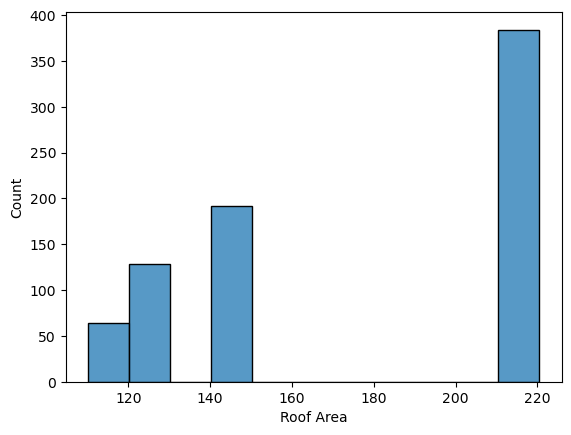

In [32]:
#Seaborn Histogram for Roof Area
sns.histplot(data = df, x = 'Roof Area')

c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Overall Height', ylabel='Count'>

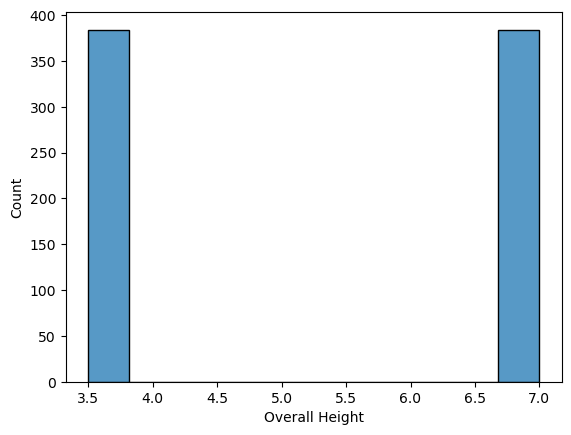

In [33]:
#Seaborn Histogram for Overall Height

sns.histplot(data = df, x = 'Overall Height')


c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Orientation', ylabel='Count'>

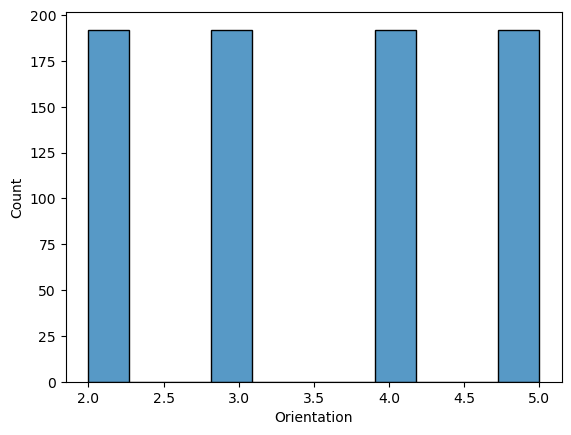

In [34]:
#Seaborn Histogram for Orientation

sns.histplot(data = df, x = 'Orientation')

c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Glazing Area', ylabel='Count'>

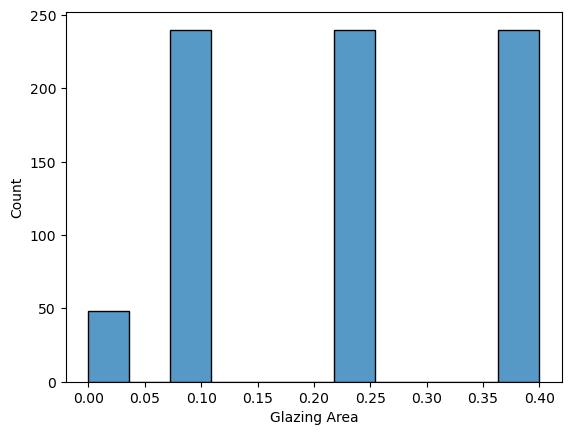

In [35]:
#Seaborn  Histogram of Glazing Area

sns.histplot(data = df, x = 'Glazing Area')


c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Glazing Area Distribution', ylabel='Count'>

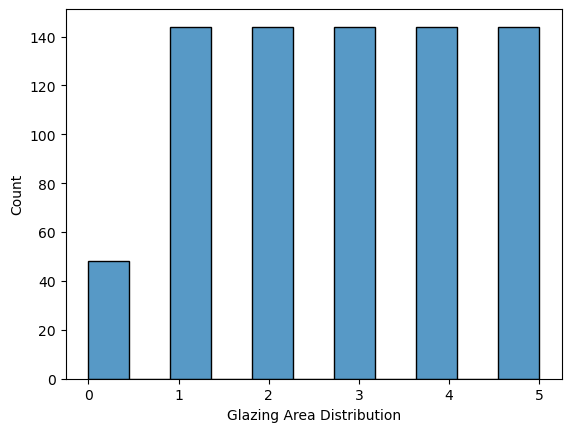

In [36]:
#Seaborn Histogram of Glazing Area Distribution

sns.histplot(data = df, x = 'Glazing Area Distribution')

c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Heating Load', ylabel='Count'>

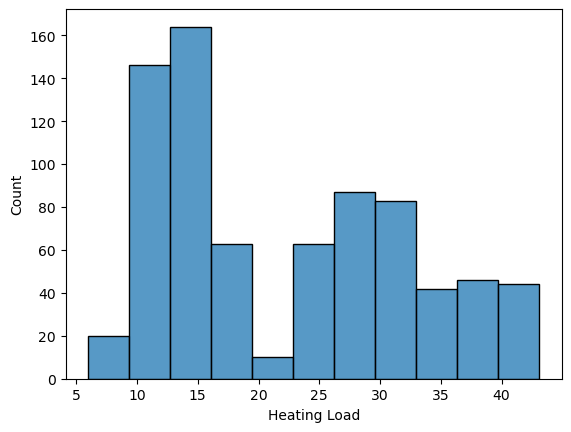

In [37]:
#Seaborn Histogram of Heating Load
sns.histplot(data = df, x = 'Heating Load')

Bivariate Analysis

We'll be conducting bivariate analysis to visualize the relationship between multiple variables. 

c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Relative Compactness', ylabel='Heating Load'>

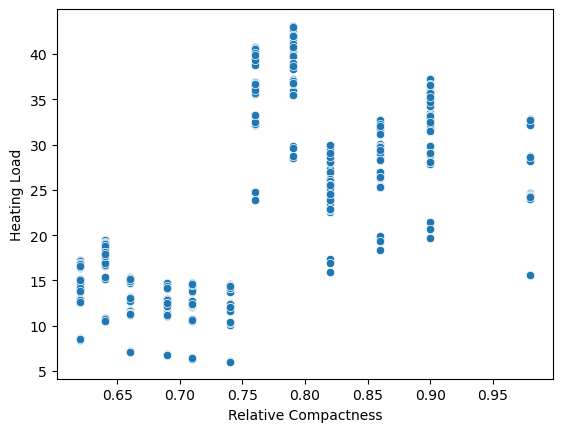

In [43]:
#Scatterplot - Relative Compactness and Heating Load

sns.scatterplot(data = df, x = 'Relative Compactness', y = 'Heating Load')

c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Surface Area', ylabel='Heating Load'>

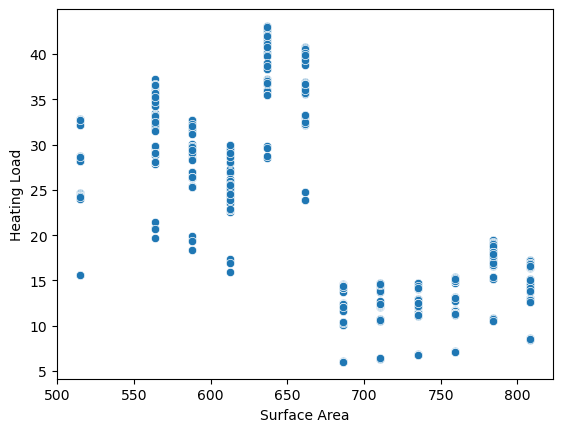

In [44]:
#Scatterplot - Surface Area and Heating Load
sns.scatterplot(data = df, x = 'Surface Area', y = 'Heating Load')

c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Wall Area', ylabel='Heating Load'>

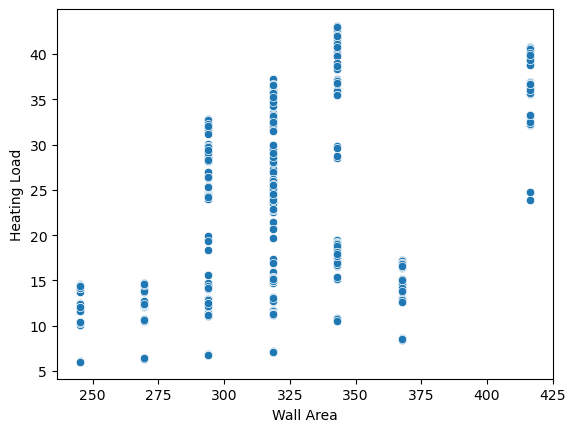

In [45]:
#Scatterplot - Wall Area and Heating Load
sns.scatterplot(data = df, x = 'Wall Area', y = 'Heating Load')

c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Roof Area', ylabel='Heating Load'>

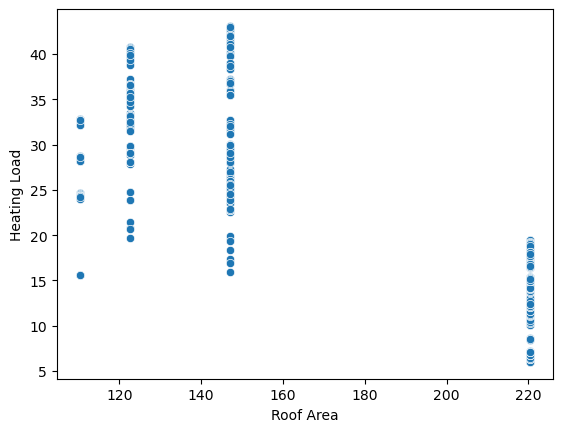

In [47]:
#Scatterplot - Roof Area and Heating Load
sns.scatterplot(data = df, x = 'Roof Area', y = 'Heating Load')

c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Orientation', ylabel='Heating Load'>

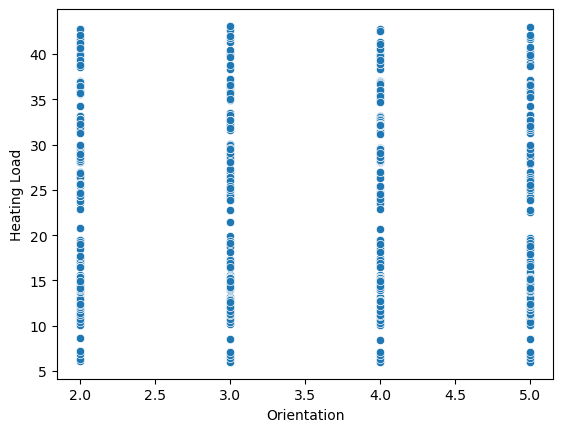

In [50]:
#Scatterplot - Orientation and Heating Load
sns.scatterplot(data = df, x = 'Orientation', y = 'Heating Load')

c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Glazing Area', ylabel='Heating Load'>

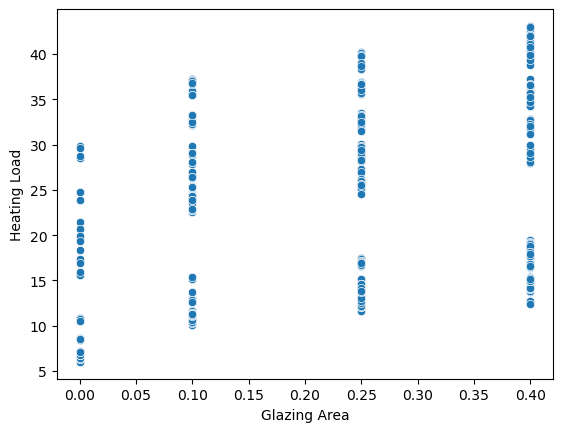

In [51]:
#Scatterplot - Glazing Area and Heating Load
sns.scatterplot(data = df, x = 'Glazing Area', y = 'Heating Load')

c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Glazing Area Distribution', ylabel='Heating Load'>

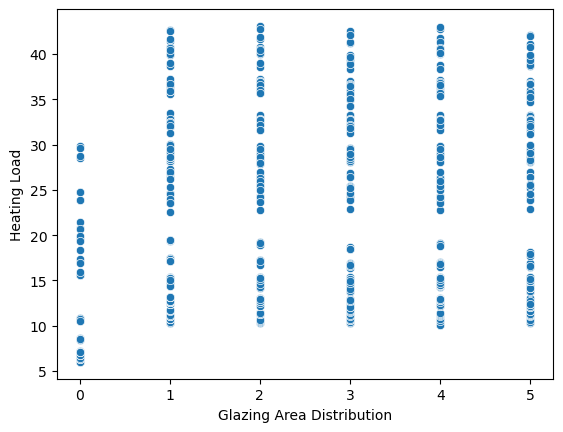

In [52]:
#Scatterplot - Glazing Area Distribution and Heating Load
sns.scatterplot(data = df, x = 'Glazing Area Distribution', y = 'Heating Load')

c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

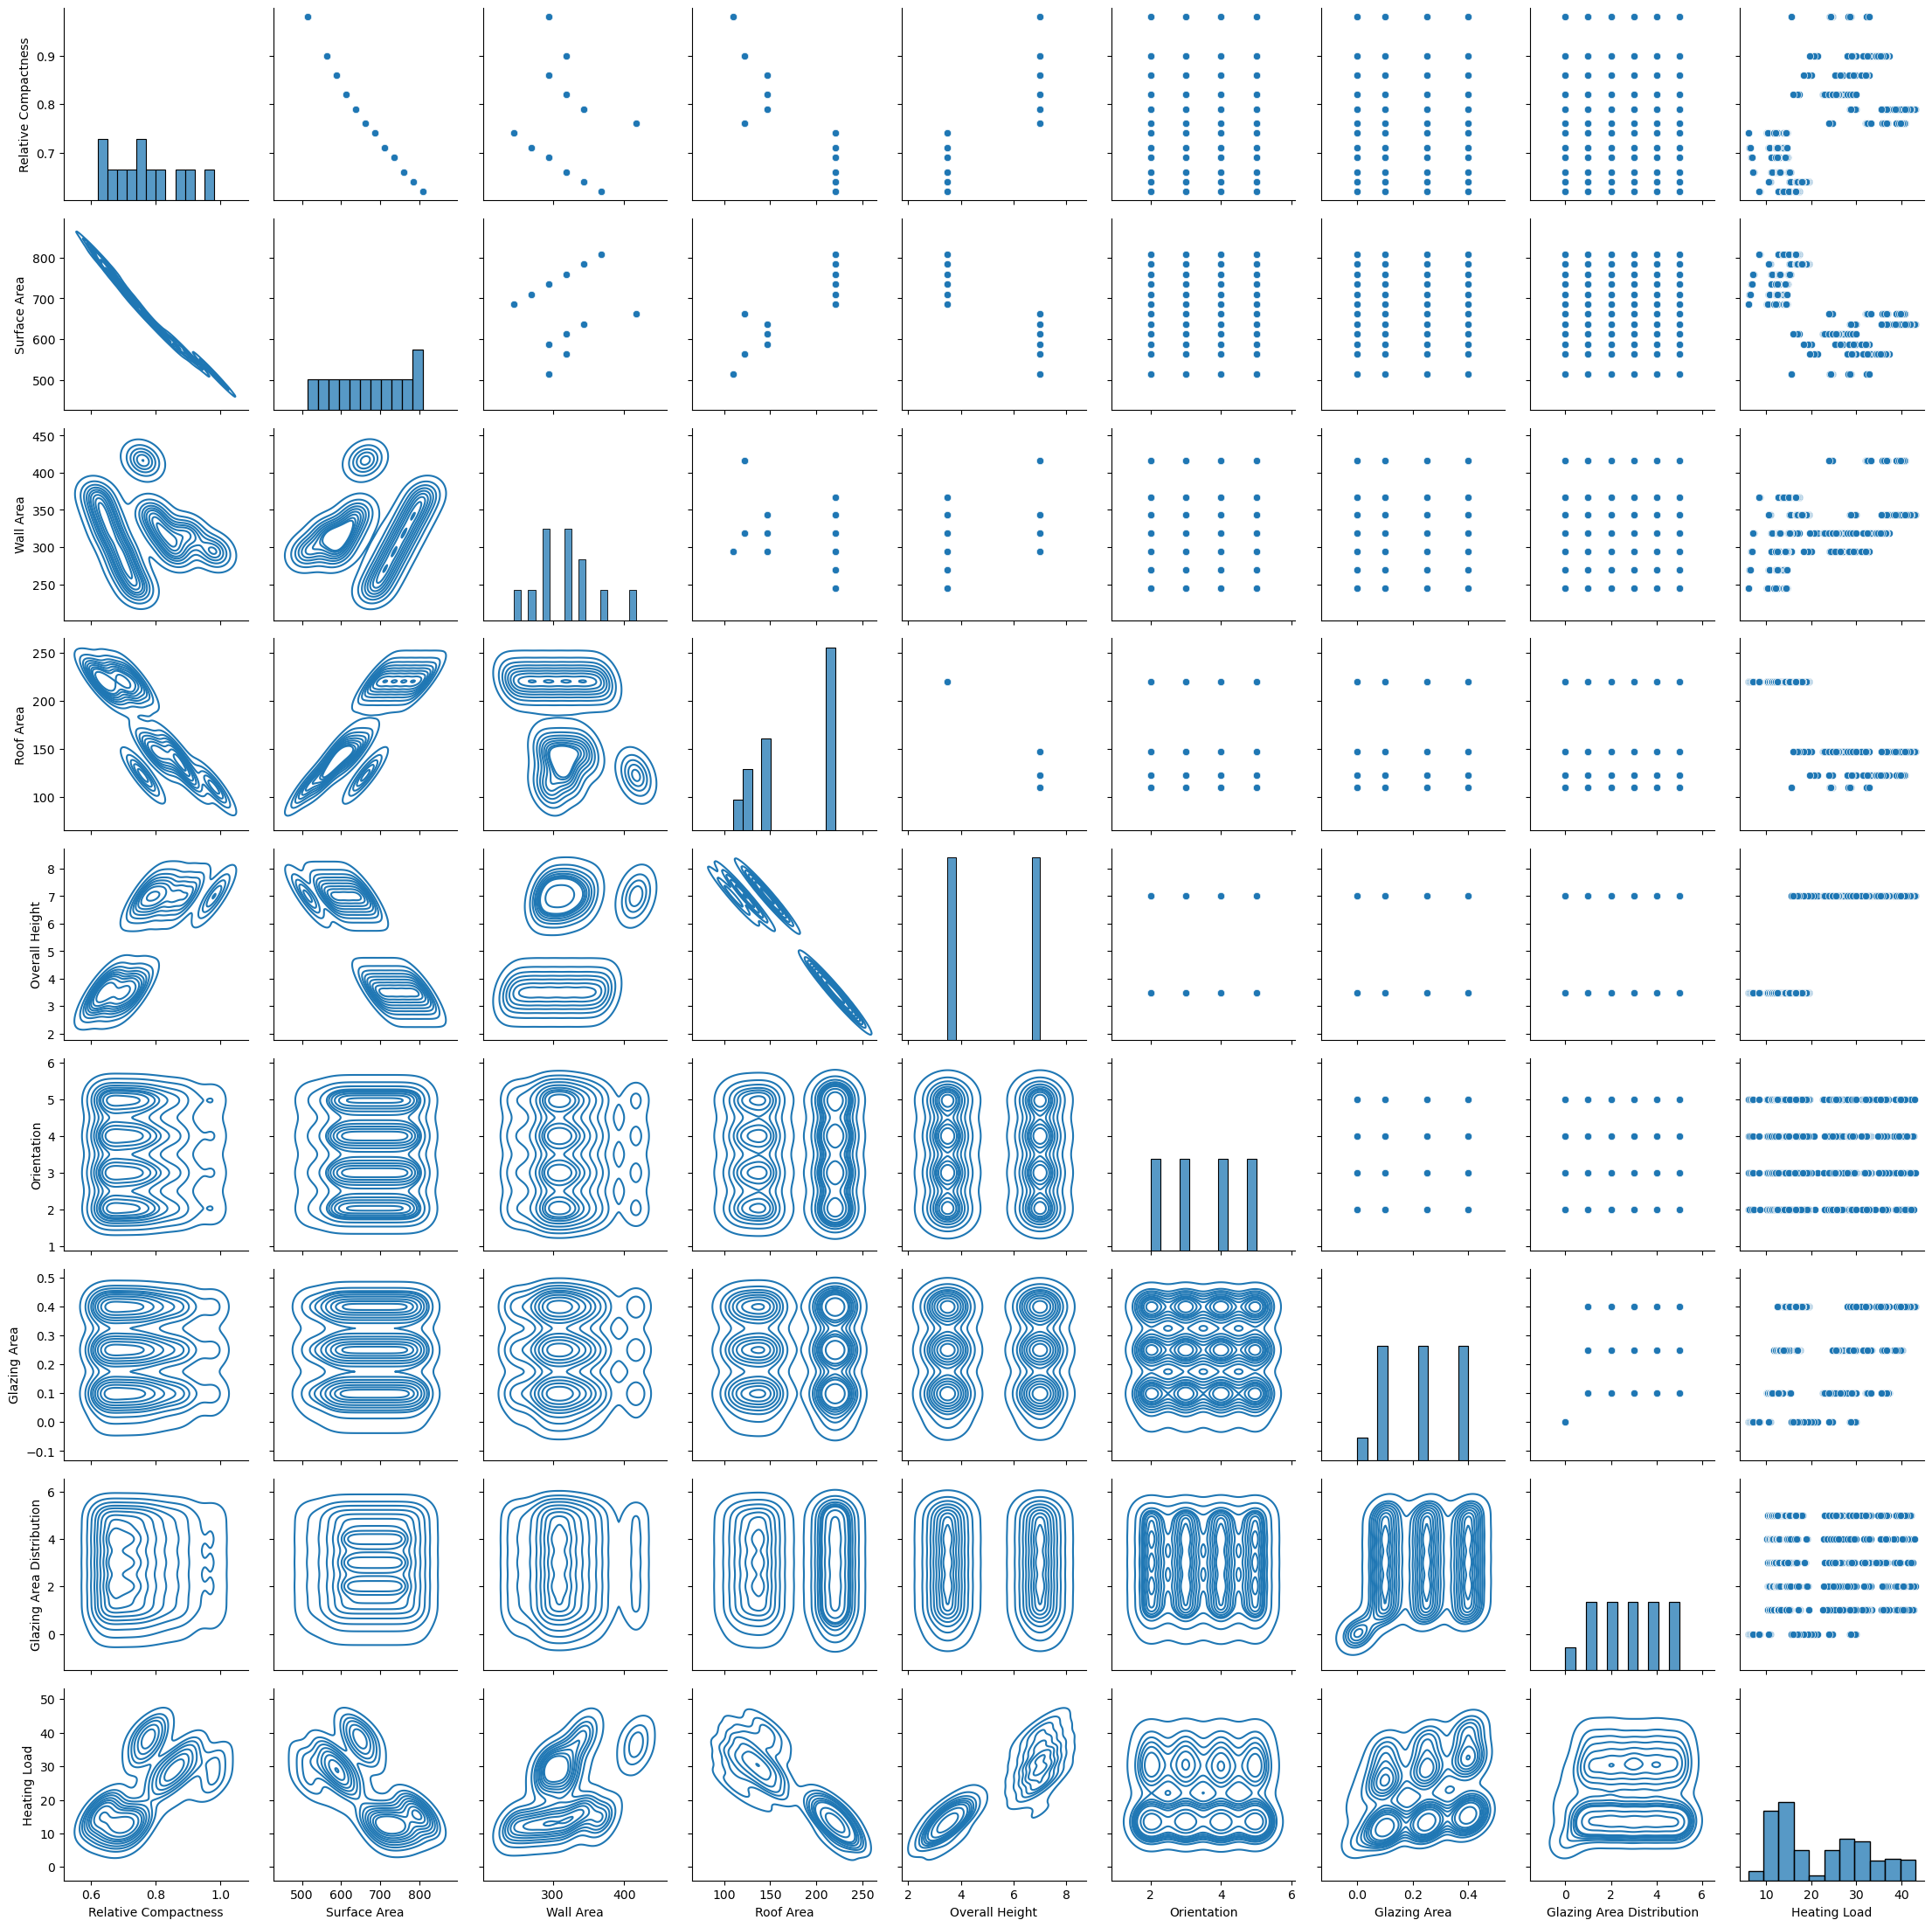

In [40]:
#Seaborn pairplot to plot multiple bivariate distributions in dataset
g = sns.PairGrid(df)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

In [42]:
from IPython.display import Markdown
Markdown("<span style='font-size:18pt'>Exploratory Data Analysis Observations")

<span style='font-size:18pt'>Exploratory Data Analysis Observations

Here are the following observations made about our dataset based on our visuals: 